# Lab 1: Introduction to PyTorch
- Objective: Build foundational PyTorch skills to support LLM training and parallelism topics later in the course.

# 🛠️ SETUP AND INSTALLATIONS
- Before starting, ensure the following packages are installed.
- You can run these commands directly in your notebook or terminal.

- Install PyTorch (check https://pytorch.org for the latest command based on your system)
- For CPU only:
    - !pip install torch torchvision torchaudio

- For GPU support (if using CUDA):
    - !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

- Install HuggingFace Transformers (used later in the course):
    - !pip install transformers

- for plotting or future labs:
    - !pip install matplotlib


# SECTION 1: What is PyTorch and What Are Tensors?
===============================================================
- PyTorch is an open-source machine learning library developed by Meta (Facebook).
- It is widely used in research and production for building and training neural networks.
- PyTorch uses Tensors, which are multi-dimensional arrays (like NumPy arrays) but with GPU support.

In [1]:
import torch

# Creating Tensors
# A tensor is a container for data. Think of it like a list or matrix but more powerful.
a = torch.tensor([1.0, 2.0, 3.0])           # 1D tensor
b = torch.ones((3,))                       # Tensor of ones
c = torch.zeros((2, 2))                    # 2x2 tensor of zeros
d = torch.rand((2, 2))                     # 2x2 tensor with random values
f = torch.tensor([[1, 2], [3, 4]])          # 2D tensor

print("1. Tensor a: ", a)
print("2. Tensor b:", b)
print("3. Tensor c:", c)
print("4. Tensor d:", d)
print("5. Tensor f:", f)

1. Tensor a:  tensor([1., 2., 3.])
2. Tensor b: tensor([1., 1., 1.])
3. Tensor c: tensor([[0., 0.],
        [0., 0.]])
4. Tensor d: tensor([[0.3429, 0.2393],
        [0.8260, 0.3502]])
5. Tensor f: tensor([[1, 2],
        [3, 4]])


In [2]:
# 📌 Basic Tensor Operations
# Just like using numbers, you can add, multiply, and perform matrix operations on tensors.
x = a + b
y = a * 2
z = f @ f  # Matrix multiplication
l = f.T  # Transpose of f
m = f.view(4)  # Reshape f to a 1D tensor

print("6. Tensor x (a + b):", x)
print("7. Tensor y (a * 2):", y)
print("8. Tensor z (f @ f):", z)
print("9. Tensor l (Transpose of f):", l)
print("10. Tensor m (Reshape f to 1D):", m)


6. Tensor x (a + b): tensor([2., 3., 4.])
7. Tensor y (a * 2): tensor([2., 4., 6.])
8. Tensor z (f @ f): tensor([[ 7, 10],
        [15, 22]])
9. Tensor l (Transpose of f): tensor([[1, 3],
        [2, 4]])
10. Tensor m (Reshape f to 1D): tensor([1, 2, 3, 4])


# SECTION 2: Autograd - Automatic Differentiation
# ===============================================================
- PyTorch can compute derivatives automatically using autograd.
- This is essential for training neural networks (i.e., backpropagation).

In [3]:
x = torch.tensor([2.0], requires_grad=True)  # Tell PyTorch to track this tensor

# Define a function y = x^2 + 3x + 4
y = x ** 2 + 3 * x + 4

print("y =", y)

# Compute gradient (dy/dx)
y.backward()  # This computes the derivative
print("dy/dx =", x.grad)  # Should be 2x + 3 = 7 when x = 2

y = tensor([14.], grad_fn=<AddBackward0>)
dy/dx = tensor([7.])


# SECTION 3: Building and Training a Simple Model

- Let's train a simple linear regression model using PyTorch.
-  Our goal: predict Y from X using a line (y = wx + b)

## 1. Import Libraries 

In [4]:
import torch.nn as nn  # torch neural networks module to build models 
import torch.optim as optim # optimization module for training models
import matplotlib.pyplot as plt # for plotting data

## Simulate dummy data

In [5]:
X = torch.rand((100, 1))  # 100 samples, 1 feature each
Y = 3 * X + 0.5 + 0.1 * torch.randn_like(X)  # y = 3x + 0.5 with noise , torch.randn_like(X) generates random noise with the same shape as X 

print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("First 5 samples of X:", X[:5])
print("First 5 samples of Y:", Y[:5])

X shape: torch.Size([100, 1])
Y shape: torch.Size([100, 1])
First 5 samples of X: tensor([[0.6464],
        [0.1472],
        [0.3020],
        [0.5350],
        [0.3630]])
First 5 samples of Y: tensor([[2.4097],
        [0.8558],
        [1.4058],
        [2.0592],
        [1.6289]])


##  Define a simple neural network with 1 input and 1 output

In [6]:
model = nn.Linear(1, 1) # Define a simple neural network with 1 input and 1 output

print("Model parameters before training: \n")

print(f"Weight: {model.weight} \n") # The weight of the model, we will learn this during training, we have only one weight since we have one input feature

print(f"Bias : {model.bias} \n") # The bias of the model, we will learn this during training, the bias is used to shift the line up or down, the intuition is that the line does not have to go through the origin (0,0), we can shift it up or down.

print(f"Model structure: {model} \n") # The model structure, it shows that we have one input and one output, and the model is a linear model (y = wx + b)

print(f"Model parameters: {list(model.parameters())} \n") # The model parameters, it shows that we have one weight and one bias

print(f"Model parameters (weight and bias): {model.state_dict()} \n") # The model parameters in a dictionary format, it shows that we have one weight and one bias

print(f"Type of model: {type(model)} \n") # The type of model, it shows that we have a linear model

print(f"Tyoe of model parameters: {type(model.parameters())}") # The type of model parameters, it shows that we have a generator object, we can iterate over it to get the weight and bias


Model parameters before training: 

Weight: Parameter containing:
tensor([[0.3104]], requires_grad=True) 

Bias : Parameter containing:
tensor([0.5055], requires_grad=True) 

Model structure: Linear(in_features=1, out_features=1, bias=True) 

Model parameters: [Parameter containing:
tensor([[0.3104]], requires_grad=True), Parameter containing:
tensor([0.5055], requires_grad=True)] 

Model parameters (weight and bias): OrderedDict([('weight', tensor([[0.3104]])), ('bias', tensor([0.5055]))]) 

Type of model: <class 'torch.nn.modules.linear.Linear'> 

Tyoe of model parameters: <class 'generator'>


## Define Loss Function and Optimizer

In [7]:
# Define loss function (Mean Squared Error)
criterion = nn.MSELoss() # Mean Squared Error (MSE) is a common loss function for regression tasks, it measures the average squared difference between the predicted and actual values,     
                         # the lower the MSE, the better the model is performing, it is a good choice for regression tasks where we want to minimize the difference between the predicted and actual values
                         # MSE is defined as: MSE = 1/n * Σ(y_i - ŷ_i)^2, where y_i is the actual value, ŷ_i is the predicted value, and n is the number of samples

# Define optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1) # Learning rate is a hyperparameter that controls how much to change the model parameters at each step, 
                                                    # the lower the learning rate, the slower the model learns, but it can lead to better results,
                                                    # the higher the learning rate, the faster the model learns, but it can lead to worse results
                                                    # it's usually a good idea to start with a small learning rate and increase it if the model is not learning well

## Training Loop

In [8]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()            # Clear previous gradients
    outputs = model(X)               # Forward pass
    loss = criterion(outputs, Y)     # Compute loss
    loss.backward()                  # Backward pass (compute gradients)
    optimizer.step()                 # Update parameters
    losses.append(loss.item())
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

Epoch [20/100], Loss: 0.2218
Epoch [40/100], Loss: 0.1394
Epoch [60/100], Loss: 0.0892
Epoch [80/100], Loss: 0.0586
Epoch [100/100], Loss: 0.0400


## Show Results

In [9]:
# Print trained weights
print("Trained weight:", model.weight.item())
print("Trained bias:", model.bias.item())

Trained weight: 2.3911173343658447
Trained bias: 0.8422505259513855


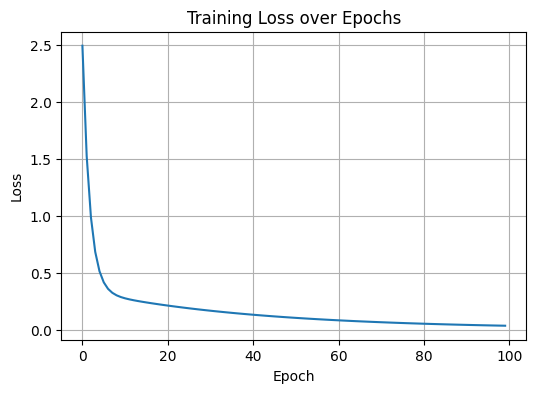

In [10]:
# Plot training loss
plt.figure(figsize=(6, 4))
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

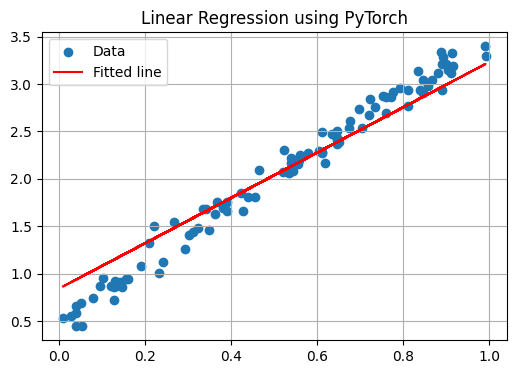

In [11]:
# Plot the fitted line
predicted = model(X).detach()
plt.figure(figsize=(6, 4))
plt.scatter(X.numpy(), Y.numpy(), label='Data')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Fitted line')
plt.title("Linear Regression using PyTorch")
plt.legend()
plt.grid(True)
plt.show()


# CLASSWORK QUESTIONS (Hands-On Practice)

1.  Modify the learning rate in the optimizer to `0.01` and rerun training. What happens to convergence?
2. Increase the number of training epochs to `200`. Does the loss improve more?
3. Add more noise to the data (e.g., change `0.1` to `0.5`). How does the fitted line look?